In [1]:
#import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
#import data
df = pd.read_csv(r'C:\Users\ibrah\Downloads\D3.csv')
df.head(); # To get first n rows from the dataset default value of n is 5
m = len(df)

In [3]:
# set inputs to X1, X2, X3
X1 = df.values[:, 0]
X2 = df.values[:, 1]
X3 = df.values[:, 2]
# set foruth column to output y 
y = df.values[:, 3]

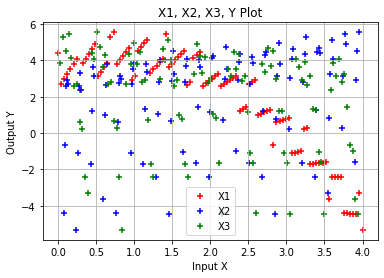

In [4]:
#plot X1, X2, X3, Y plot
plt.scatter(X1,y, color='red',marker= '+', label= 'X1')
plt.scatter(X2,y, color='blue',marker= '+', label= 'X2') 
plt.scatter(X3,y, color='green',marker= '+', label= 'X3') 
plt.grid() 
plt.rcParams["figure.figsize"] = (10,6) 
plt.xlabel('Input X') 
plt.ylabel('Output Y') 
plt.title('X1, X2, X3, Y Plot') 
plt.legend()

In [5]:
#Create X arrayx
X_0 = np.ones((m, 1))
X_1 = X1.reshape(m, 1)
X_2 = X2.reshape(m, 1)
X_3 = X3.reshape(m, 1)
X = np.hstack((X_0, X_1, X_2, X_3)) 

In [6]:
 """ 
      Function to compute loss

      Input Parameters: 
      ---------------- 
      X : mxn array (m = number of training examples; n= number of features).
      y : 1xm array with answer value to the training examples.
      theta : 1xn array of fitting weights.

      Output Parameters 
      ----------------- 
      J : the loss - scalar value. 
""" 
def compute_loss(X, y, theta): 

    predictions = X.dot(theta) 
    errors = np.subtract(predictions, y) 
    sqrErrors = np.square(errors) 
    J = 1 / (2 * m) * np.sum(sqrErrors) 
    return J 

In [7]:
""" 
  Function to  loss for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : mxn array (m = number of training examples; n= number of features).
  y : 1xm array with answer value to the training examples.
  theta : 1xn array of fitting weights.
  alpha : Learning rate - Scalar value. 
  iterations: No of iterations - Scalar value.  
 
  Output Parameters 
  ----------------- 
  theta : 1xn array of final fitting weights
  loss_history: m x 1 array of loss values of each iteration
  """ 
def gradient_descent(X, y, theta, alpha, iterations): 
  loss_history = np.zeros(iterations) 
 
  for i in range(iterations): 
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, y) 
    sum_delta = (alpha / m) * X.transpose().dot(errors); 
    theta = theta - sum_delta; 
    loss_history[i] = compute_loss(X, y, theta)   
 
  return theta, loss_history 

In [8]:
#declare parameters with initial values
theta = [0., 0., 0., 0.,] 
iterations = 1200; 
alpha = 0.01; 

In [9]:
#run gradient descent
theta, loss_history = gradient_descent(X, y, theta, alpha, iterations) 
print('Final value of theta =', theta) 
print('loss_history =', loss_history) 
print('Final Loss =', loss_history[-1])

Final value of theta = [ 3.74556624 -1.78212786  0.79176485 -0.03567736]
loss_history = [5.21542243 4.97171977 4.7765543  ... 0.87005462 0.86979241 0.86953071]
Final Loss = 0.8695307136350554


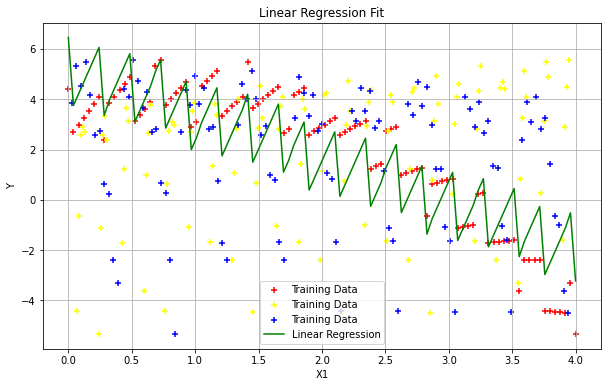

In [10]:
#plot
#take values from column 1 of X
plt.scatter(X[:,1], y, color='red', marker= '+', label= 'Training Data')
plt.scatter(X[:,2], y, color='yellow', marker= '+', label= 'Training Data')
plt.scatter(X[:,3], y, color='blue', marker= '+', label= 'Training Data')
plt.plot(X[:,1],X.dot(theta), color='green', label='Linear Regression') 
 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('X1') 
plt.ylabel('Y') 
plt.title('Linear Regression Fit') 
plt.legend() 

Text(0.5, 1.0, 'Convergence of gradient descent')

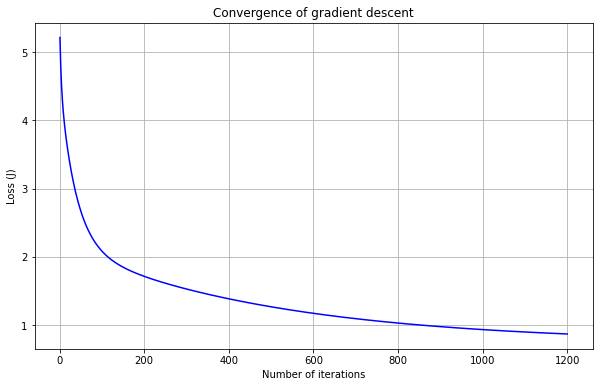

In [11]:
#plot
plt.plot(range(1, iterations + 1),loss_history, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss (J)') 
plt.title('Convergence of gradient descent') 

In [12]:
#Predict the value of y for new (X1, X2, X3) values (1, 1, 1), for (2, 0, 4), and for (3, 2, 1)
predict1 = theta[3]*(1) + theta[2]*(1) + theta[1]*(1) + theta[0] 
predict2 = theta[3]*(2) + theta[2]*(0) + theta[1]*(4) + theta[0] 
predict3 = theta[3]*(3) + theta[2]*(2) + theta[1]*(1) + theta[0] 

print('Predicted Y value for (1,1,1) is: ', predict1)
print('Predicted Y value for (2,0,4) is: ', predict2)
print('Predicted Y value for (3,2,1) is: ', predict3)

Predicted Y value for (1,1,1) is:  2.719525880049927
Predicted Y value for (2,0,4) is:  -3.4542999079393053
Predicted Y value for (3,2,1) is:  3.4399360164207833
